# Audio Emotion Recognition System

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import librosa as lr
import librosa.display
import IPython.display as ipd
from PIL import Image
import os
from sklearn.model_selection import train_test_split

In [2]:
data_dir = "./Audio"
audio_files = glob(data_dir + "/*.wav")

In [3]:
data = pd.DataFrame()
Emotion = []
Emotional_Intensity = []
Statement = []
Statement_Text = []
Repetition = []
Actor = []

In [4]:
for i in range(len(audio_files)):
    temp = audio_files[i][audio_files[i].index("\\")+1:audio_files[0].index(".wav")].split("-")
    
    # creating Emotion
    if temp[2] == "01":
        Emotion.append(1)
    if temp[2] == "02":
        Emotion.append(2)
    if temp[2] == "03":
        Emotion.append(3)
    if temp[2] == "04":
        Emotion.append(4)
    if temp[2] == "05":
        Emotion.append(5)
    if temp[2] == "06":
        Emotion.append(6)
    if temp[2] == "07":
        Emotion.append(7)
    if temp[2] == "08":
        Emotion.append(8)

   ############################

    # creating Emotinal_Intensity
    if temp[3] == "01":
        Emotional_Intensity.append(1)
    if temp[3] == "02":
        Emotional_Intensity.append(2)
        
   #############################

    # creating Statement
    if temp[4] == "01":
        Statement.append(1)
        Statement_Text.append("Kids are talking by the door")
    if temp[4] == "02":
        Statement.append(2)
        Statement_Text.append("Dogs are sitting by the door")
        
    ############################
    
    # creating Repetition
    if temp[5] == "01":
        Repetition.append(1)
    if temp[5] == "02":
        Repetition.append(2)
        
    ###########################
    
    # creating actor gender
    if int(temp[6])%2 == 0:   # even --> female
        Actor.append(1)
    if int(temp[6])%2 == 1:   # odd --> male
        Actor.append(0)    


In [5]:
data["Emotion"] = Emotion
data["Emotional_Intensity"] = Emotional_Intensity
data["Statement"] = Statement
data["Statement_Text"] = Statement_Text
data["Repetition"] = Repetition
data["Actor_Gender"] = Actor

In [8]:
# feature extraction
mfcc = []
chroma_stft = []
chroma_cqt = []
chroma_cens = []
rms = []
spectral_contrast = []
spectral_bandwidth = []
tonnetz = []
zcr = []

for i in range(0,len(audio_files)):
    
    y, sr = lr.load(audio_files[i],res_type="kaiser_fast",duration=3,offset=0.5)
    sr = np.array(sr)
    mfcc.append(np.mean(lr.feature.mfcc(y=y,n_mfcc=25,)))
    chroma_stft.append(np.mean(lr.feature.chroma_stft(y=y)))
    chroma_cqt.append(np.mean(lr.feature.chroma_cqt(y=y)))
    chroma_cens.append(np.mean(lr.feature.chroma_cens(y=y)))
    rms.append(np.mean(lr.feature.rms(y=y)))
    spectral_contrast.append(np.mean(lr.feature.spectral_contrast(y=y)))
    spectral_bandwidth.append(np.mean(lr.feature.spectral_bandwidth(y=y)))
    tonnetz.append(np.mean(lr.feature.tonnetz(y=y)))
    zcr.append(np.mean(lr.feature.mfcc(y=y)))

In [9]:
mfccTarget = pd.DataFrame()
mfccTarget["mfcc"] = mfcc
mfccTarget["chroma_stft"] = chroma_stft
mfccTarget["chroma_cqt"] = chroma_cqt
mfccTarget["chroma_cens"] = chroma_cens
mfccTarget["rms"] = rms
mfccTarget["spectral_contrast"] = spectral_contrast
mfccTarget["spectral_bandwidth"] = spectral_bandwidth
mfccTarget["tonnetz"] = tonnetz
mfccTarget["zcr"] = zcr

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sn

In [12]:
# estimators = 1000
#randomforest model
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(mfccTarget,data["Emotion"],test_size=0.30, random_state=42,shuffle=True)

rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
print("Random Forest algorithm result: ",rf.score(X_test,y_test))
print("Classification Report")
print(classification_report(y_test, predictions))

Random Forest algorithm result:  0.42824074074074076
Classification Report
              precision    recall  f1-score   support

           1       0.60      0.25      0.35        24
           2       0.50      0.82      0.62        56
           3       0.33      0.32      0.33        63
           4       0.40      0.27      0.32        64
           5       0.53      0.44      0.48        55
           6       0.45      0.32      0.38        62
           7       0.34      0.38      0.36        56
           8       0.40      0.60      0.48        52

    accuracy                           0.43       432
   macro avg       0.45      0.42      0.41       432
weighted avg       0.43      0.43      0.41       432



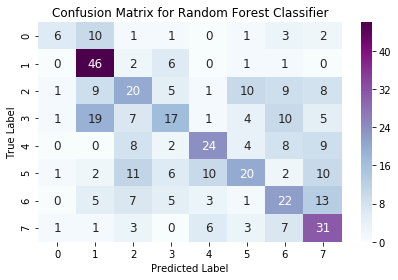

In [55]:
%matplotlib inline

predictions = rf.predict(X_test)
#labels = ["Neutral","Calm", "Happy", "Sad", "Angry", "Fearful", "Disgust", "Suprised"]
matrix = confusion_matrix(y_test, predictions)
sn.heatmap(matrix, annot=True, cmap="BuPu", annot_kws={"size": 12})

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Random Forest Classifier')

plt.ylim([8,0]) 
plt.tight_layout()
plt.show()

In [14]:
#catboost model
from catboost import CatBoostClassifier
clf = CatBoostClassifier(logging_level='Silent',random_seed=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.4212962962962963

Classification Report
              precision    recall  f1-score   support

           1       0.36      0.21      0.26        24
           2       0.49      0.79      0.60        56
           3       0.35      0.33      0.34        63
           4       0.40      0.30      0.34        64
           5       0.53      0.47      0.50        55
           6       0.42      0.27      0.33        62
           7       0.36      0.38      0.37        56
           8       0.40      0.56      0.47        52

    accuracy                           0.42       432
   macro avg       0.41      0.41      0.40       432
weighted avg       0.42      0.42      0.41       432



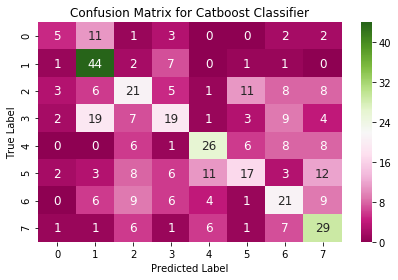

In [19]:
predictions = clf.predict(X_test)
print("Classification Report")
print(classification_report(y_test, predictions))
matrix = confusion_matrix(y_test, predictions)
sn.heatmap(matrix, annot=True, cmap="PiYG", annot_kws={"size": 12})
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Catboost Classifier')
plt.ylim([8,0]) 
plt.tight_layout()
plt.show()

Classification Report
              precision    recall  f1-score   support

           1       0.25      0.04      0.07        24
           2       0.34      0.57      0.43        56
           3       0.27      0.32      0.29        63
           4       0.25      0.22      0.23        64
           5       0.46      0.44      0.45        55
           6       0.53      0.26      0.35        62
           7       0.32      0.25      0.28        56
           8       0.35      0.52      0.42        52

    accuracy                           0.34       432
   macro avg       0.35      0.33      0.31       432
weighted avg       0.35      0.34      0.33       432



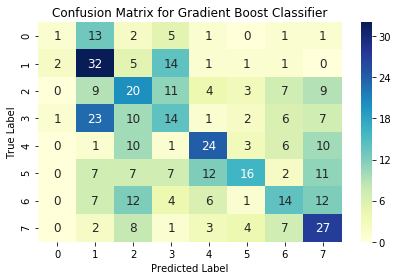

In [18]:
#Gradientboost model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=20, max_features=2, max_depth=2, random_state=42)
gb_clf.fit(X_train, y_train)

predictions = gb_clf.predict(X_test)


print("Classification Report")
print(classification_report(y_test, predictions))

matrix = confusion_matrix(y_test, predictions)
sn.heatmap(matrix, annot=True, cmap="YlGnBu", annot_kws={"size": 12})
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Gradient Boost Classifier')
plt.ylim([8,0]) 
plt.tight_layout()
plt.show()

Accuracy 0.35185185185185186
Classification Report
              precision    recall  f1-score   support

           1       0.22      0.25      0.24        24
           2       0.38      0.43      0.40        56
           3       0.30      0.32      0.31        63
           4       0.30      0.27      0.28        64
           5       0.47      0.42      0.44        55
           6       0.41      0.35      0.38        62
           7       0.33      0.36      0.34        56
           8       0.36      0.38      0.37        52

    accuracy                           0.35       432
   macro avg       0.35      0.35      0.35       432
weighted avg       0.35      0.35      0.35       432



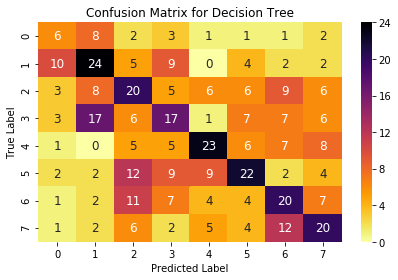

In [40]:
#desiciontree model
from sklearn.tree import DecisionTreeClassifier
s = DecisionTreeClassifier(random_state=42)
s.fit(X_train, y_train)
print("Accuracy",s.score(X_test,y_test))
predictions = s.predict(X_test)


print("Classification Report")
print(classification_report(y_test, predictions))

matrix = confusion_matrix(y_test, predictions)
sn.heatmap(matrix, annot=True, cmap="inferno_r", annot_kws={"size": 12})
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision Tree')
plt.ylim([8,0]) 
plt.tight_layout()
plt.show()

Accuracy 0.40046296296296297
Classification Report
              precision    recall  f1-score   support

           1       0.35      0.29      0.32        24
           2       0.42      0.68      0.52        56
           3       0.38      0.37      0.37        63
           4       0.25      0.20      0.22        64
           5       0.55      0.49      0.52        55
           6       0.51      0.29      0.37        62
           7       0.33      0.30      0.32        56
           8       0.42      0.58      0.48        52

    accuracy                           0.40       432
   macro avg       0.40      0.40      0.39       432
weighted avg       0.40      0.40      0.39       432



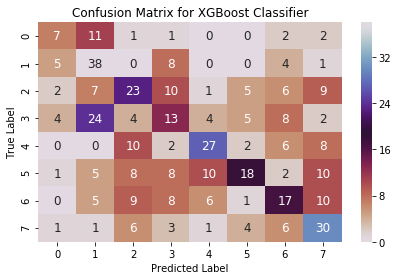

In [44]:
#xgboost model
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
print("Accuracy",model.score(X_test,y_test))
predictions = model.predict(X_test)
print("Classification Report")
print(classification_report(y_test, predictions))

matrix = confusion_matrix(y_test, predictions)
sn.heatmap(matrix, annot=True, cmap="twilight_r", annot_kws={"size": 12})
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.ylim([8,0]) 
plt.tight_layout()
plt.show()

In [ ]:
#When we analyze model's fscore and confusion matrix,We can see models can predict more accurate
#calm,fearfull and suprised labels but can not predict neutral label